# Programming for Data Analysis Project 2019


### Arnoud van Balkom

## Life expectancy of males living in Ireland

![](http://www.northernhillscofc.org/wp-content/uploads/2018/12/life-expectancy-decline.jpg)

In [1]:
# Import the required libraries and use the standard abbreviations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set my preferred style for seaborn plots
sns.set_style("darkgrid")

## Introduction

When I say "life expectancy", what I am talking about is the mean age at death. It's something that affects all of us, and I am very curious to find out which of my chosen variables affect it the most. I have chose 4 other variables, of which I expect at least 3 to strongly influence life expectancy. Also I would like to find out how all variables correlate with each other. I will then use python code to simulate a correlated dataset.

### Variables used
- Life expectancy
- Birth weight
- Birth place by province
- IQ
- Height

## Part 1: Variables explained and first attempt at a dataset

### 1.1 Life expectancy of males in Ireland

After investigation I found that the mean life expectancy of males living in Ireland is 80.4 years.[$^{1}$](http://publicpolicy.ie/downloads/papers/2019/Irish_Population_Health_Life_Expectancy_and_Mortality.pdf)
I turns out life expectancy is not a perfect normal distribution. For instance, age can not be negative, and a normal distribution assumes negative possibilities. Also it seems impossible for males to reach 120 years of age due to genetic restrictions, yet the normal distribution assumes possible values till infinity. But despite these facts, the normal distribution describes the data I found well enough to use it.
It turns out the standard deviation is around 12. The standard deviation is a very useful number, which tells us how far from the mean 68 percent of the data is located. 95 percent of the data is located within 2 standard deviations.

In [3]:
# Set the values for the mean and the standard deviation and use them to generate 1000 values, following the normal distribution.
meanle = 80.4
stdle = 12
le = np.random.normal(80.4, 12, 1000)

In [4]:
# Display the 1000 values that were created. I'll only be doing this the first time to check if the code worked.
le

array([ 50.94122794,  71.724386  ,  71.05696434,  82.4026127 ,
        77.35057698,  74.35563499,  96.64070706,  70.83576916,
        69.84885981,  86.21187022,  76.38295197,  71.19430383,
        79.38541962,  84.07986615,  81.18866649,  76.30623379,
        86.7348703 ,  88.40784087,  87.82774575,  88.83525823,
        68.86473857,  54.89985217,  87.02748573,  81.27471192,
       100.65178518,  82.26551934,  69.14318333,  91.41218739,
        70.93683757,  79.36804487,  78.76394342,  78.26451635,
        66.07602278,  74.88607655,  77.55154722,  77.39950524,
       102.71040822,  68.10290248,  79.04798243,  94.01381519,
        72.04571053,  85.83970185,  60.76190338,  80.15519118,
        80.26240572, 118.91923583,  66.37070747,  69.2332887 ,
        69.10629451,  89.01361295,  80.25306246,  79.8059222 ,
        84.36418549,  61.05413784,  81.03204665,  81.5331502 ,
        65.31198386,  81.30158264,  72.08670621,  92.10400145,
        83.67229418,  97.78676151,  75.87016467,  76.76

C:\Users\Arnoud\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


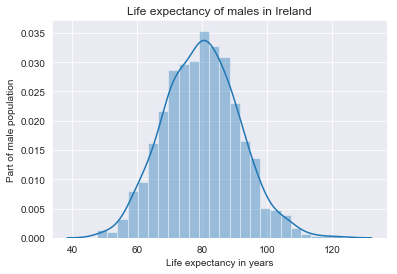

In [5]:
# Plot a distplot to take a quick look at the distribution
sns.distplot(le)
plt.xlabel("Life expectancy in years")
plt.ylabel("Part of male population")
plt.title("Life expectancy of males in Ireland");

Let's have a look at the mean and the medain

In [6]:
np.mean(le)

79.85899405162154

In [7]:
np.median(le)

79.79655340896184

The mean and the median are very close in value, which is a sign of a normally distributed variable. Also the bell curve in above plot suggests a normal distribution.

Now that I know which distribution to use, I can start creating the first column of my synthesized dataset.

In [8]:
# Creata a pandas dataframe called df and add a column "Life expectancy in years"
df = pd.DataFrame(le, columns = ["Life expectancy in years"])

In [9]:
# Display the life expectancy as an integer
# I found out how to do this here: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
df["Life expectancy in years"] = pd.DataFrame(le, columns = ["Life expectancy in years"])
df["Life expectancy in years"] = df["Life expectancy in years"].astype(int) 
df

,Life expectancy in years
0,50
1,71
2,71
3,82
4,77
5,74
6,96
7,70
8,69
9,86


### 1.2 Birth weight

The mean birthweight for male babies in Ireland is 3541 grams. [$^{2}$](https://www.publichealth.ie/files/file/Unequal_at_Birth.pdf)
Birth weight can be described by the normal distribution. Although, like with life expectancy, it is not perfect, it is close enough.
I could not find exact data for Ireland as regards to the standard deviation, but I found it to be 570 grams in the United States, and am going to assume it won't differ too much from the situation in Ireland. [$^{3}$](https://appohigh.enschool.org/ourpages/auto/2012/8/29/41712937/Standard%20Normal%20Distributions%209-24-12.pdf)


In [10]:
# Set values for mean and standarddeviation
meanbw = 3541
stdbw = 570
# Generate 1000 values using the normal distribution
bw = np.random.normal(3541, 570, 1000)

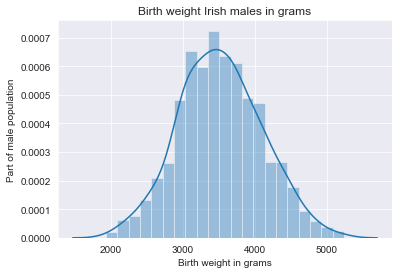

In [11]:
sns.distplot(bw) # distplot is used to take a quick look at the distribution
plt.xlabel("Birth weight in grams")
plt.ylabel("Part of male population")
plt.title("Birth weight Irish males in grams");

In [12]:
# Display the birth weight as an integer and add to dataframe
df["Birth Weight in grams"] = pd.DataFrame(bw, columns = ["Birth Weight in grams"])
df["Birth Weight in grams"] = df["Birth Weight in grams"].astype(int)
df

,Life expectancy in years,Birth Weight in grams
0,50,3862
1,71,3300
2,71,3991
3,82,4109
4,77,3064
5,74,3715
6,96,3566
7,70,3556
8,69,3455
9,86,3458


In [13]:
# Show mean and median
np.mean(bw)

3524.230333818577

In [14]:
np.median(bw)

3495.0959967437775

The mean and median are again very close in value, suggesting a normal distribution.

### 1.3 Province of birth

In [15]:
# Set the probabilities for someone to be born in each of the provinces. Figures derived from official data. 
# For ulster, the Northern-Irish counties have not been included.
ulster = 0.06
munster = 0.28
leinster = 0.54
connacht = 0.12

With numpy.random.choice we can now generate values for the different provinces, using the values set in the cell above.

In [16]:
# Create 1000 values for the column "Province"
prov = ["Ulster", "Munster", "Leinster", "Connacht"]
rprov = np.random.choice(prov, 1000, p=[ulster, munster, leinster, connacht])

In [17]:
# Add the column "Province" to the dataframe
df["Province"] = pd.DataFrame(rprov, columns = ["Province"])

In [18]:
df

,Life expectancy in years,Birth Weight in grams,Province
0,50,3862,Munster
1,71,3300,Leinster
2,71,3991,Ulster
3,82,4109,Munster
4,77,3064,Leinster
5,74,3715,Munster
6,96,3566,Munster
7,70,3556,Leinster
8,69,3455,Ulster
9,86,3458,Munster


In [19]:
# Count how often each province is represented in the dataset
Ulster = df.Province[df.Province == "Ulster"].count()
Leinster = df.Province[df.Province == "Leinster"].count()
Munster = df.Province[df.Province == "Munster"].count()
Connacht = df.Province[df.Province == "Connacht"].count()

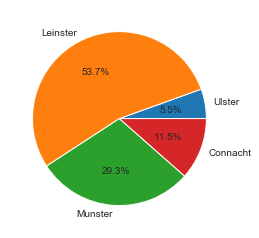

In [20]:
# Plot a pie plot with the percentage per province
# Set labels for the pie plot
a = ([Ulster, Leinster, Munster, Connacht])
labels = "Ulster", "Leinster", "Munster", "Connacht" 
# Plot a pie plot, round the percentages at 1 decimal to make it more readable.
plt.pie(a,labels = labels, autopct ="%1.1f%%");
# learned about pie plot here: https://pythonspot.com/matplotlib-pie-chart/

### 1.4 IQ

IQ is a numerical value, with integers ranging from 0 to infinity (but very few score higher than 140). 
After investigation, I found that the average IQ in Ireland is 92. [$^{4}$](http://worldpopulationreview.com/countries/average-iq-by-country/)
There is a lot of debate about which of the sexes has the highest IQ, but most research shows little to no difference. Therefore I am going to take 92 as the mean IQ of males in Ireland.
IQ is normally distributed (although not completely, as there is no negative IQ, but it is otherwise very close to being normally distributed). And I found that the standard deviation in developed countries is close to 12. [$^{5}$](https://infoproc.blogspot.com/2010/11/standard-deviations-around-world.html)

In [21]:
avgiq = 92
std = 12

iq = np.random.normal(avgiq,std, 1000 )

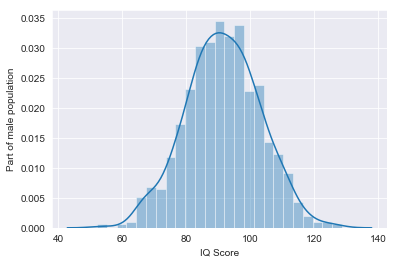

In [22]:
sns.distplot(iq)
plt.xlabel("IQ Score")
plt.ylabel("Part of male population");

As you can see in above plot, the values around the mean of 92 are highest represented, and the <em> bell curve </em> that the normal distribution gives, shows us the further away from 92, the more unlikely the scores are.

In [23]:
# Add a column "IQ" to the dataframe as an integer
df["IQ"] = pd.DataFrame(iq, columns = ["IQ"])
df["IQ"] = df["IQ"].astype(int)
df

,Life expectancy in years,Birth Weight in grams,Province,IQ
0,50,3862,Munster,102
1,71,3300,Leinster,81
2,71,3991,Ulster,106
3,82,4109,Munster,94
4,77,3064,Leinster,101
5,74,3715,Munster,78
6,96,3566,Munster,79
7,70,3556,Leinster,91
8,69,3455,Ulster,90
9,86,3458,Munster,91


### 1.5 Height

The average height of adult males in Ireland is 178.9 cm. [$^{6}$](https://www.thejournal.ie/height-irish-2899850-Jul2016/)
Height is very close to being normally distributed. The standard deviation is around 7.6. [$^{7}$](https://ourworldindata.org/uploads/2019/06/distribution-1.png)

In [24]:
# Set mean and standarddeviation values
meanh = 178.9
stdh = 7.6
# Create 1000 values for "height"
height = np.random.normal(meanh, stdh, 1000)

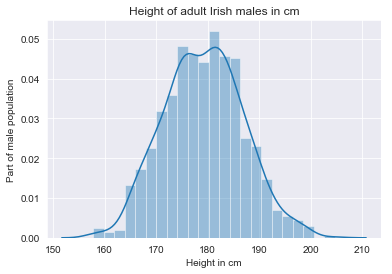

In [25]:
sns.distplot(height)
plt.xlabel("Height in cm")
plt.ylabel("Part of male population")
plt.title("Height of adult Irish males in cm");

In [26]:
# Add a new column "Height" to the dataframe as an integer
df["Height in cm"] = pd.DataFrame(height, columns = ["Height in cm"])
df["Height in cm"] = df["Height in cm"].astype(int)
df

,Life expectancy in years,Birth Weight in grams,Province,IQ,Height in cm
0,50,3862,Munster,102,167
1,71,3300,Leinster,81,180
2,71,3991,Ulster,106,181
3,82,4109,Munster,94,166
4,77,3064,Leinster,101,187
5,74,3715,Munster,78,181
6,96,3566,Munster,79,174
7,70,3556,Leinster,91,184
8,69,3455,Ulster,90,189
9,86,3458,Munster,91,177


## Part 2: Relationships between variables

We now have a dataset with 1000 data points. The data is realistically distributed for every variable separataly. However, we have not yet considered any potential correlations between variables. I want to know the degree to which the variables are correlated, so I am going to try and find out the measure of interdepence (correlation) between the different variables. Once you have done your research and have an idea of the correlations, Numpy offers a way of using this data to adjust the dataset accordingly. It does so using the <em> multivariate </em> function, which can be used on normal distributions. It gives you the opportunity to model linear correlations between random, normally distributed, variables. However, this function works with the covariance, and I am looking for the correlation. This means I also have to take the standard deviation into account. The correlation is the covariance, normalized by the product of standard deviations, which gives us a value <em>r</em>, between -1 and 1. [$^{8}$](https://realpython.com/python-random/) A value of -1 corresponds to a negative linear correlation, while a value of 1 means a positive linear correlation. A value of 0 indicates no relationship between the variables.

### 2.1 Relationships between variables

After doing my research I found out the province of birth has little to no effect on the life expectancy or any of the other variables. Therefore I will regard this variable as random, not correlated with the rest, and will ignore it for the rest of this project. 
 
The other 4 variables are all related in some way or another, and through thorough research I have come up with estimated values for their covariances.

It turns out, the higher your iq, the higher your life expectancy. On the other hand, height had a clear negative correlation with life expectancy, as did birth weight (albeit to a lesser degree). A low birth weight is related to a lower iq, and the same is true for smaller people, who tend to have a lower iq. And finally there is a strong positive relationship between birth weight and height. I have estimated the correlations with the help of several scientific articles I found. [$^{9}$](https://www.statnews.com/2017/06/28/high-iq-children-longevity-study/) [$^{10}$](https://medicalxpress.com/news/2014-03-genetic-link-height-iq.html) [$^{11}$](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1071721/)
[$^{12}$](https://www.reuters.com/article/us-health-iq-birth-weight-idUSKCN18E29J)
[$^{13}$](https://www.ncbi.nlm.nih.gov/pubmed/10206622)

### 2.2 Calculate the exact correlations between variables and simulate correlated dataset

In [27]:
# Create a function "covstd" that can be called later. This function creates a covariance matrix from the correlations and standarddeviations.
def covstd(corrmatrix, stds) -> np.ndarray:
    cvmatrix = np.diag(stds)
    return cvmatrix @ corrmatrix @ cvmatrix # Multiply the matrices
# I spent hours trying to figure out how to do this, and finally found some inspiration here: https://realpython.com/python-random/

In [28]:
# Set the correlation values between the variables. The diagonal from top left to bottom right is always 1, as it is the correlation with the variable itself.
corr = np.array([[1.0,0.18,0.4,-0.3],
                [0.18,1.0,0.3,0.65],
                [0.4,0.3,1.0,0.25], 
                [-0.3,0.65,0.25,1.0]])
# https://realpython.com/python-random/

In [29]:
corr

array([[ 1.  ,  0.18,  0.4 , -0.3 ],
       [ 0.18,  1.  ,  0.3 ,  0.65],
       [ 0.4 ,  0.3 ,  1.  ,  0.25],
       [-0.3 ,  0.65,  0.25,  1.  ]])

In [30]:
# Set the standard deviation, mean and covariance values for all 4 variables
std = np.array([12, 570, 12, 7.6])
mean = np.array ([80.4, 3541, 92, 178.9])
cov = covstd(corr, std)

In [31]:
# Use Numpy's multivariate function to generate 1000 correlated values for each variable
lexp = np.random.multivariate_normal(mean = mean, cov = cov, size = 1000)
# Display as integers
lexp.astype(int)
# https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.multivariate_normal.html

array([[  88, 4232,  126,  189],
       [  94, 2768,   85,  162],
       [  97, 4495,  128,  185],
       ...,
       [ 103, 3698,  109,  174],
       [  80, 4102,   83,  180],
       [  69, 3695,   84,  177]])

In [32]:
# Create new dataframe "dfcor" with the 4 correlated variables
dfcor = pd.DataFrame(lexp, columns = {"Life expectancy in years":np.random.normal(80.4, 12), "Birth weight in grams":np.random.normal(3541, 570), 
                                     "IQ":np.random.normal(92,12), "Height in cm":np.random.normal(178.9, 7.6)})

In [33]:
# Display the final correlated and turn the floats into integers
dfcor = dfcor.astype(int)
pd.options.display.max_rows = None # Show every row of the dataset, instead of showing only a part of it, as is standard. 
# https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook/49841608
dfcor

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
0,88,4232,126,189
1,94,2768,85,162
2,97,4495,128,185
3,86,3762,91,171
4,77,3516,102,183
5,74,3826,119,186
6,87,3020,104,174
7,90,3706,103,175
8,98,3542,106,183
9,89,3354,82,177


In [34]:
# Describe the dfcor dataset to see how realistic it is.
dfcor.describe()

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,80.168000,3552.995000,91.565000,178.519000
std,12.260183,575.149325,12.237055,7.504396
min,36.000000,1690.000000,55.000000,158.000000
25%,72.000000,3169.000000,83.000000,173.000000
50%,80.000000,3532.000000,91.000000,178.000000
75%,88.000000,3948.750000,100.000000,184.000000
max,117.000000,5522.000000,133.000000,201.000000


The mean values are close to the values I found in official sources. Overall I am happy with the values and correlations of my simulated dataset.

## Part 3: Visualizations and data check

### 3.1 Double check our correlations

Let's see if the correlations worked correctly and check the values of the other variables for every person below 1.75, compared to everyone who is 1.75 or taller.

In [35]:
# Create 2 new categories, "smallpeople", and "tallpeople".
smallpeople = dfcor[dfcor["Height in cm"] < 175]
tallpeople = dfcor[dfcor["Height in cm"] > 174]

In [36]:
# Show the rows with data from all persons smaller than 175 cm.
smallpeople

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
1,94,2768,85,162
3,86,3762,91,171
6,87,3020,104,174
27,73,3002,67,174
29,76,3191,85,171
35,86,3093,89,169
40,69,3466,84,174
42,79,2908,88,166
47,88,2545,96,170
53,92,3459,71,169


In [37]:
# Show the rows with data from all persons taller than 174 cm.
tallpeople

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
0,88,4232,126,189
2,97,4495,128,185
4,77,3516,102,183
5,74,3826,119,186
7,90,3706,103,175
8,98,3542,106,183
9,89,3354,82,177
10,80,3832,89,188
11,87,3530,93,180
12,79,4275,91,192


In [38]:
smallpeople.mean()

Life expectancy in years      84.408497
Birth weight in grams       3130.565359
IQ                            87.486928
Height in cm                 169.918301
dtype: float64

In [39]:
tallpeople.mean()

Life expectancy in years      78.298271
Birth weight in grams       3739.253602
IQ                            93.363112
Height in cm                 182.311239
dtype: float64

When looking at the mean values, it is clear that tall people have a much lower life expectancy, a much higher weight at birth, and a higher IQ. It seems our simulated dataset now shows proper correlations.

### 3.2 Visualiziations

To further visualize the correlations I am going to plot a few interesting ones.

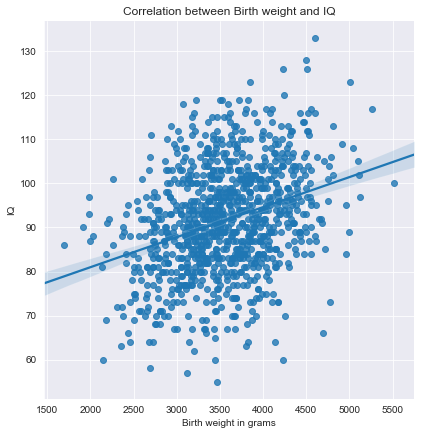

In [40]:
sns.lmplot(x="Birth weight in grams", y="IQ", data=dfcor, height = 6)
plt.title("Correlation between Birth weight and IQ");

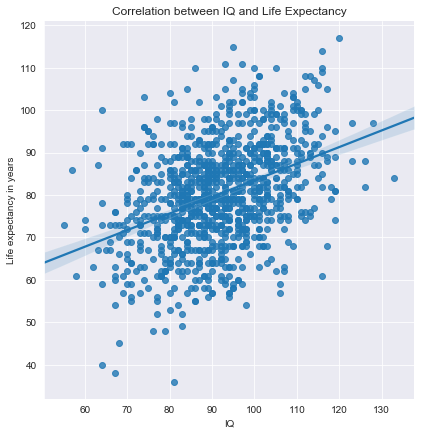

In [41]:
sns.lmplot(x="IQ", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between IQ and Life Expectancy");

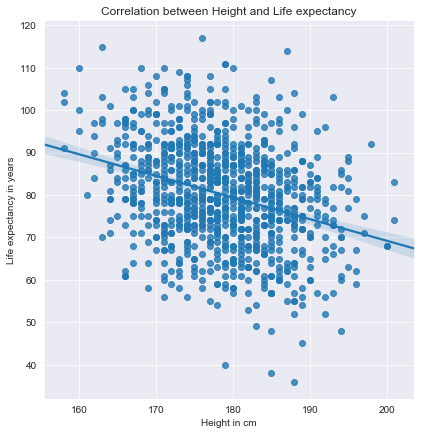

In [42]:
sns.lmplot(x="Height in cm", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between Height and Life expectancy");

Very clear to see the positive correlations between <em>birth weight</em> and <em>IQ</em>, and <em>IQ</em> and <em>life expectancy</em>. In the bottom plot, the negative correlation between <em>height</em> and <em>life expectancy</em> is easy to see. It seems we succeeded in simulating a correlated dataset. Let's make absolutely sure by plotting a pairplot of all possible correlations.

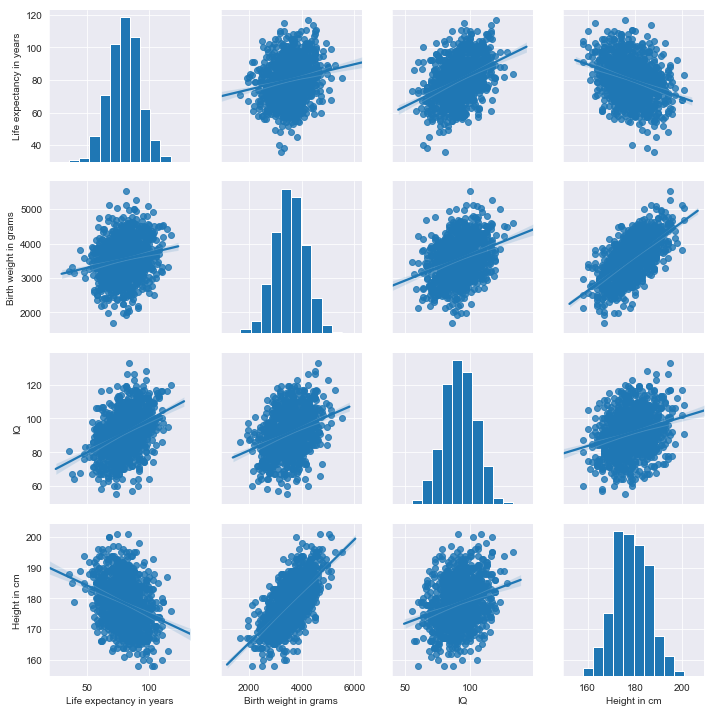

In [43]:
# Plot a pairplot of all possible correlations and fit linear regression models to the scatter plots.
sns.pairplot(dfcor, kind="reg");

Indeed, all correlations are consistent with the correlations I found and used to adjust my dataset. The most interesting correlation for me, as a tall guy, was the negative correlation between height and life expectancy. Time to get exercising and beat the odds!

## References

1. Life expectancy Ireland: http://publicpolicy.ie/downloads/papers/2019/Irish_Population_Health_Life_Expectancy_and_Mortality.pdf
2. Birth weight Ireland: https://www.publichealth.ie/files/file/Unequal_at_Birth.pdf
3. Birth weight and standard deviation: https://appohigh.enschool.org/ourpages/auto/2012/8/29/41712937/Standard%20Normal%20Distributions%209-24-12.pdf
4. Average IQ per country: http://worldpopulationreview.com/countries/average-iq-by-country/
5. IQ and standarddeviation https://infoproc.blogspot.com/2010/11/standard-deviations-around-world.html
6. Average height of Irish males: https://www.thejournal.ie/height-irish-2899850-Jul2016/
7. Standard deviation of height: https://ourworldindata.org/uploads/2019/06/distribution-1.png
8. Creating correlation between variables in a simulated dataset: https://realpython.com/python-random/
9. Correlation between IQ and life expectancy: https://www.statnews.com/2017/06/28/high-iq-children-longevity-study/
10. Correlation between height and IQ: https://medicalxpress.com/news/2014-03-genetic-link-height-iq.html
11. Correlation between height and life expectancy: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1071721/
12. Correlation between iq and birth weight: https://www.reuters.com/article/us-health-iq-birth-weight-idUSKCN18E29J
13. Correlation between birth weight height: https://www.ncbi.nlm.nih.gov/pubmed/10206622
14. Turning floats into integers in pandas dataset: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
15. How to create a pie chart: https://pythonspot.com/matplotlib-pie-chart/
16. Numpy.multivariate: https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.multivariate_normal.html
17. How to display entire dataset: https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook/49841608

18. Video on summarising datasets with pandas and seaborn by Ian McLoughlin: https://web.microsoftstream.com/video/57715d30-ea78-4003-ba05-2b254ddb3da2?referrer=https://learnonline.gmit.ie/course/view.php?id=1127
